<a href="https://colab.research.google.com/github/RFOXgithub/Sistem-Rekomendasi-Pengelolaan-Produk/blob/main/Final_Project_Model_and_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [ ]:
df = pd.read_csv(r'final-project/data-final-project-cleaned-atribut-extend.csv')

In [ ]:
#Dynamic Pricing Model

In [ ]:
#Skenario Perbandingan Model

dfDPM = df.drop(columns=['nama_produk', 'desc', 'store', 'kategori', 'sub_kategori', 'harga_kategori'], errors='ignore')
X = dfDPM[['avg_harga_per_kategori', 'harga_per_rating', 'harga_terjual']]
y = dfDPM['harga_kategori_encoding']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf_modelPrice = RandomForestClassifier(bootstrap=True, criterion='gini', max_depth=10, max_features='sqrt', min_samples_split=5, n_estimators=200)
rf_modelPrice.fit(X_train_scaled, y_train)

lr_modelPrice = LogisticRegression(C=10, max_iter=100, penalty='l2', solver='lbfgs')
lr_modelPrice.fit(X_train_scaled, y_train)

svm_modelPrice = SVC(C=1, gamma='scale', kernel='linear', tol=0.001)
svm_modelPrice.fit(X_train_scaled, y_train)

knn_modelPrice = KNeighborsClassifier(n_neighbors=7, p=2, weights='uniform')
knn_modelPrice.fit(X_train_scaled, y_train)

xgb_modelPrice = XGBClassifier(learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8)
xgb_modelPrice.fit(X_train_scaled, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
#Clasification Report Testing and Training Evaluation
models = {'Random Forest': rf_modelPrice, 'Logistic Regression': lr_modelPrice, 'SVM': svm_modelPrice, 'KNN': knn_modelPrice, 'XGBoost': xgb_modelPrice}

for model_name, model in models.items():
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    print(f"{model_name} - Training Data Evaluation:")
    print(classification_report(y_train, y_train_pred, zero_division=1))

    print(f"{model_name} - Testing Data Evaluation:")
    print(classification_report(y_test, y_test_pred, zero_division=1))

Random Forest - Training Data Evaluation:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       235
           1       0.95      0.95      0.95       166
           2       1.00      0.98      0.99       215

    accuracy                           0.97       616
   macro avg       0.97      0.97      0.97       616
weighted avg       0.97      0.97      0.97       616

Random Forest - Testing Data Evaluation:
              precision    recall  f1-score   support

           0       0.90      0.85      0.88       115
           1       0.56      0.73      0.64        48
           2       0.97      0.89      0.93       101

    accuracy                           0.84       264
   macro avg       0.81      0.82      0.81       264
weighted avg       0.86      0.84      0.85       264

Logistic Regression - Training Data Evaluation:
              precision    recall  f1-score   support

           0       0.68      0.95      0.79       23

In [ ]:
#Cross Validation Evaluation
for model_name, model in models.items():
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    print(f'{model_name} - Cross-validation scores: {cv_scores}')
    print(f'{model_name} - Mean CV score: {np.mean(cv_scores)}\n')

Random Forest - Cross-validation scores: [0.85483871 0.83739837 0.83739837 0.87804878 0.87804878]
Random Forest - Mean CV score: 0.8571466037241018

Logistic Regression - Cross-validation scores: [0.75806452 0.77235772 0.75609756 0.7398374  0.72357724]
Logistic Regression - Mean CV score: 0.7499868869656438

SVM - Cross-validation scores: [0.5483871  0.70731707 0.71544715 0.69918699 0.69918699]
SVM - Mean CV score: 0.6739050616312615

KNN - Cross-validation scores: [0.75       0.79674797 0.78861789 0.80487805 0.75609756]
KNN - Mean CV score: 0.7792682926829269

XGBoost - Cross-validation scores: [0.85483871 0.83739837 0.84552846 0.8699187  0.8699187 ]
XGBoost - Mean CV score: 0.8555205874639393



In [ ]:
#Confusion Matrix Evaluation
predictions = pd.DataFrame({
    'Actual': y_test,
    'Random Forest': rf_modelPrice.predict(X_test_scaled),
    'Logistic Regression': lr_modelPrice.predict(X_test_scaled),
    'SVM': svm_modelPrice.predict(X_test_scaled),
    'KNN': knn_modelPrice.predict(X_test_scaled),
    'XGBoost': xgb_modelPrice.predict(X_test_scaled)
})

for model_name in models.keys():
    print(f"Crosstab for {model_name}:")
    crosstab = pd.crosstab(predictions['Actual'], predictions[model_name], margins=True)
    print(crosstab)
    print("\n")

Crosstab for Random Forest:
Random Forest    0   1   2  All
Actual                         
0               98  17   0  115
1               10  35   3   48
2                1  10  90  101
All            109  62  93  264


Crosstab for Logistic Regression:
Logistic Regression    0   1   2  All
Actual                               
0                    103  11   1  115
1                     28  15   5   48
2                      3  11  87  101
All                  134  37  93  264


Crosstab for SVM:
SVM       0   1    2  All
Actual                   
0       110   2    3  115
1        34   7    7   48
2         5   6   90  101
All     149  15  100  264


Crosstab for KNN:
KNN       0   1    2  All
Actual                   
0        94  19    2  115
1        15  24    9   48
2         1  11   89  101
All     110  54  100  264


Crosstab for XGBoost:
XGBoost    0   1   2  All
Actual                   
0        100  15   0  115
1         11  33   4   48
2          0   7  94  101
All      1

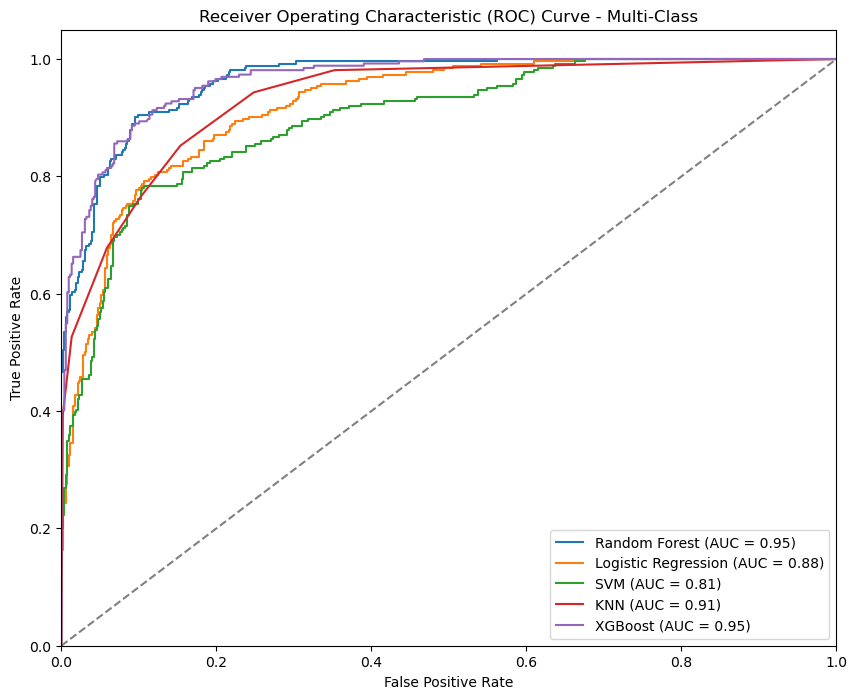

In [ ]:
#ROC AUC Evaluation
y_train_bin = label_binarize(y_train, classes=[0, 1, 2])
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

plt.figure(figsize=(10, 8))

for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)

    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test_scaled)
    else:
        y_prob = model.decision_function(X_test_scaled)

    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_prob.ravel())
    auc_score = roc_auc_score(y_test_bin, y_prob, multi_class='ovr')

    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Multi-Class')
plt.legend(loc='lower right')
plt.show()

In [ ]:
#Pencarian Param
dfDPM = df.drop(columns=['nama_produk', 'desc', 'store', 'kategori', 'sub_kategori', 'harga_kategori'], errors='ignore')
X = dfDPM[['avg_harga_per_kategori', 'harga_per_rating', 'harga_terjual']]
y = dfDPM['harga_kategori_encoding']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

param_grids = {
    "RandomForest": {'n_estimators': [100, 200, 300], 'max_depth': [5, 10], 'min_samples_split': [2, 5], 'max_features': ['sqrt']},
    "LogisticRegression": {'C': [0.1, 1, 10], 'penalty': ['l2'], 'solver': ['lbfgs', 'liblinear'], 'max_iter': [100, 200]},
    "SVM": {'C': [0.1, 1], 'kernel': ['linear', 'rbf'], 'gamma': ['scale']},
    "KNN": {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance'], 'metric': ['minkowski'], 'p': [2]},
    "XGBoost": {'n_estimators': [100, 200], 'learning_rate': [0.1], 'max_depth': [3, 6], 'subsample': [0.8, 1.0]}
}

models = {
    "RandomForest": RandomForestClassifier(),
    "LogisticRegression": LogisticRegression(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier()
}

best_models = {model_name: GridSearchCV(model, param_grids[model_name], cv=5, n_jobs=-1).fit(X_train_scaled, y_train).best_estimator_ for model_name, model in models.items()}

for model_name, best_model in best_models.items():
    y_pred = best_model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Best Params: {best_model.get_params()}")
    print(f"Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

RandomForest Best Params: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Accuracy: 0.8523
              precision    recall  f1-score   support

           0       0.90      0.85      0.88       115
           1       0.58      0.73      0.65        48
           2       0.97      0.91      0.94       101

    accuracy                           0.85       264
   macro avg       0.82      0.83      0.82       264
weighted avg       0.87      0.85      0.86       264

[[98 17  0]
 [10 35  3]
 [ 1  8 92]]
LogisticRegression Best Params: {'C': 10, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1,

In [ ]:
#Product Restock Prediction Model

In [ ]:
#Skenario Perbandingan Model

dfDPM = df.drop(columns=['nama_produk', 'desc', 'store', 'kategori', 'sub_kategori', 'harga_kategori', 'restock', 'popularitas'], errors='ignore')
X = dfDPM[['stok_ideal','stok_terjual_ratio', 'rasio_penjualan_stok']]
y = dfDPM['restock_encoding']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampleds, y_train_resampleds = smote.fit_resample(X_train, y_train)

undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train_resampleds, y_train_resampleds)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

rf_modelStock = RandomForestClassifier(n_estimators=100, max_depth=7, min_samples_leaf=1, random_state=None)
rf_modelStock.fit(X_train_scaled, y_train_resampled)

lr_modelStock = LogisticRegression(C=10, solver='lbfgs', penalty='l2', random_state=None, max_iter=100)
lr_modelStock.fit(X_train_scaled, y_train_resampled)

svm_modelStock = SVC(kernel='linear', C=1, random_state=None)
svm_modelStock.fit(X_train_scaled, y_train_resampled)

knn_modelStock = KNeighborsClassifier(n_neighbors=5, weights='distance', metric='minkowski')
knn_modelStock.fit(X_train_scaled, y_train_resampled)

xgb_modelStock = XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=None)
xgb_modelStock.fit(X_train_scaled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
#Clasification Report Testing and Training Evaluation
models = {'Random Forest': rf_modelStock, 'Logistic Regression': lr_modelStock, 'SVM': svm_modelStock, 'KNN': knn_modelStock, 'XGBoost': xgb_modelStock}

for model_name, model in models.items():
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    print(f"{model_name} - Training Data Evaluation:")
    print(classification_report(y_train_resampled, y_train_pred, zero_division=1))

    print(f"{model_name} - Testing Data Evaluation:")
    print(classification_report(y_test, y_test_pred, zero_division=1))

Random Forest - Training Data Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       438
           1       0.96      0.98      0.97       438
           2       0.98      0.96      0.97       438

    accuracy                           0.98      1314
   macro avg       0.98      0.98      0.98      1314
weighted avg       0.98      0.98      0.98      1314

Random Forest - Testing Data Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       0.62      0.72      0.67        32
           2       0.95      0.92      0.94       186

    accuracy                           0.91       264
   macro avg       0.86      0.88      0.87       264
weighted avg       0.92      0.91      0.92       264

Logistic Regression - Training Data Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       43

In [ ]:
#Cross Validation Evaluation
for model_name, model in models.items():
    cv_scores = cross_val_score(model, X_train_scaled, y_train_resampled, cv=5, scoring='accuracy')
    print(f'{model_name} - Cross-validation scores: {cv_scores}')
    print(f'{model_name} - Mean CV score: {np.mean(cv_scores)}\n')

Random Forest - Cross-validation scores: [0.96958175 0.96577947 0.96958175 0.95437262 0.97709924]
Random Forest - Mean CV score: 0.9672829651989667

Logistic Regression - Cross-validation scores: [0.76425856 0.79467681 0.75665399 0.79087452 0.72519084]
Logistic Regression - Mean CV score: 0.7663309436043305

SVM - Cross-validation scores: [0.76806084 0.76806084 0.74524715 0.7756654  0.73664122]
SVM - Mean CV score: 0.758735088381273

KNN - Cross-validation scores: [0.94296578 0.92775665 0.9581749  0.9391635  0.94656489]
KNN - Mean CV score: 0.9429251443996168

XGBoost - Cross-validation scores: [0.97718631 0.96958175 0.98479087 0.96958175 0.96946565]
XGBoost - Mean CV score: 0.9741212666531215



In [ ]:
#Confusion Matrix Evaluation
predictions = pd.DataFrame({
    'Actual': y_test,
    'Random Forest': rf_modelStock.predict(X_test_scaled),
    'Logistic Regression': lr_modelStock.predict(X_test_scaled),
    'SVM': svm_modelStock.predict(X_test_scaled),
    'KNN': knn_modelStock.predict(X_test_scaled),
    'XGBoost': xgb_modelStock.predict(X_test_scaled)
})

for model_name in models.keys():
    print(f"Crosstab for {model_name}:")
    crosstab = pd.crosstab(predictions['Actual'], predictions[model_name], margins=True)
    print(crosstab)
    print("\n")

Crosstab for Random Forest:
Random Forest   0   1    2  All
Actual                         
0              46   0    0   46
1               0  23    9   32
2               0  14  172  186
All            46  37  181  264


Crosstab for Logistic Regression:
Logistic Regression   0   1    2  All
Actual                               
0                    46   0    0   46
1                     0  16   16   32
2                     0  23  163  186
All                  46  39  179  264


Crosstab for SVM:
SVM      0   1    2  All
Actual                  
0       46   0    0   46
1        1  12   19   32
2        0  17  169  186
All     47  29  188  264


Crosstab for KNN:
KNN      0   1    2  All
Actual                  
0       46   0    0   46
1        0  22   10   32
2        0  21  165  186
All     46  43  175  264


Crosstab for XGBoost:
XGBoost   0   1    2  All
Actual                   
0        46   0    0   46
1         0  27    5   32
2         0   7  179  186
All      46  34  184  

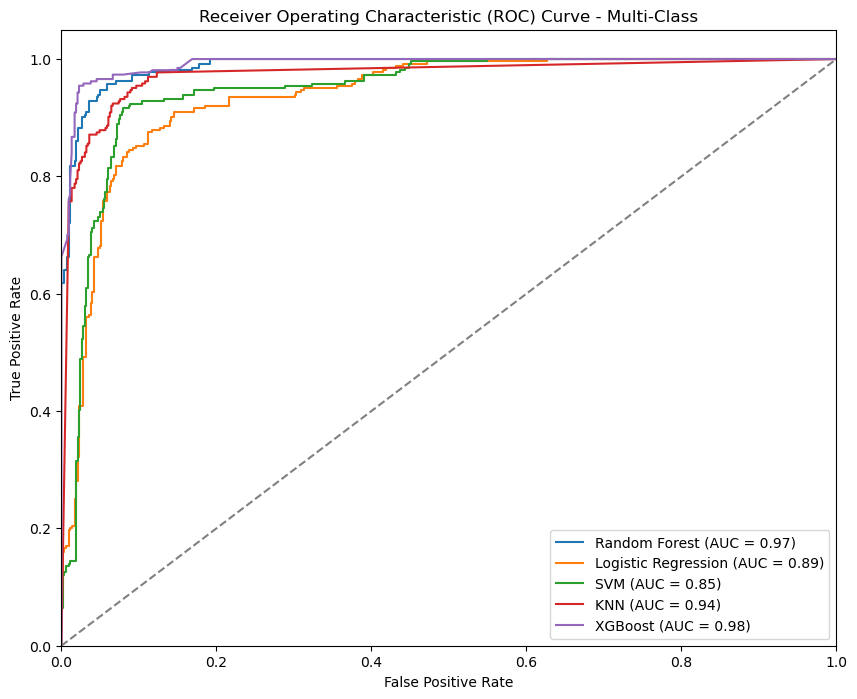

In [ ]:
#ROC AUC Evaluation
y_train_bin = label_binarize(y_train_resampled, classes=[0, 1, 2])
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

plt.figure(figsize=(10, 8))

for model_name, model in models.items():
    model.fit(X_train_scaled, y_train_resampled)

    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test_scaled)
    else:
        y_prob = model.decision_function(X_test_scaled)

    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_prob.ravel())
    auc_score = roc_auc_score(y_test_bin, y_prob, multi_class='ovr')

    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Multi-Class')
plt.legend(loc='lower right')
plt.show()

In [ ]:
#Pencarian Param
dfDPM = df.drop(columns=['nama_produk', 'desc', 'store', 'kategori', 'sub_kategori', 'harga_kategori', 'restock', 'popularitas'], errors='ignore')
X = dfDPM[['stok_ideal','stok_terjual_ratio', 'rasio_penjualan_stok']]
y = dfDPM['restock_encoding']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampleds, y_train_resampleds = smote.fit_resample(X_train, y_train)

undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train_resampleds, y_train_resampleds)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

param_grids = {
    "RandomForest": {'n_estimators': [100, 200, 300], 'max_depth': [5, 7], 'min_samples_split': [2, 5], 'max_features': ['sqrt']},
    "LogisticRegression": {'C': [0.1, 1, 10], 'penalty': ['l2'], 'solver': ['lbfgs', 'liblinear'], 'max_iter': [100, 200]},
    "SVM": {'C': [0.1, 1], 'kernel': ['linear', 'rbf'], 'gamma': ['scale']},
    "KNN": {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance'], 'metric': ['minkowski'], 'p': [2]},
    "XGBoost": {'n_estimators': [100, 200], 'learning_rate': [0.1], 'max_depth': [3, 4], 'subsample': [0.8, 1.0]}
}

models = {
    "RandomForest": RandomForestClassifier(),
    "LogisticRegression": LogisticRegression(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier()
}

best_models = {model_name: GridSearchCV(model, param_grids[model_name], cv=5, n_jobs=-1).fit(X_train_scaled, y_train_resampled).best_estimator_ for model_name, model in models.items()}

for model_name, best_model in best_models.items():
    y_pred = best_model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Best Params: {best_model.get_params()}")
    print(f"Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

D:\Aplikasi\Anaconda\Lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


RandomForest Best Params: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 7, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 300, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Accuracy: 0.9167
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       0.64      0.72      0.68        32
           2       0.95      0.93      0.94       186

    accuracy                           0.92       264
   macro avg       0.86      0.88      0.87       264
weighted avg       0.92      0.92      0.92       264

[[ 46   0   0]
 [  0  23   9]
 [  0  13 173]]
LogisticRegression Best Params: {'C': 10, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scal

In [ ]:
#Product Popularity Prediction Model

In [ ]:
#Skenario Perbandingan Model

dfDPM = df.drop(columns=['nama_produk', 'desc', 'store', 'kategori', 'sub_kategori', 'harga_kategori', 'restock', 'popularitas'], errors='ignore')
X = dfDPM[['harga_per_rating', 'rasio_penjualan_stok', 'avg_rating']]
#X = dfDPM.drop(columns=['popularitas_encoding'])
y = dfDPM['popularitas_encoding']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampleds, y_train_resampleds = smote.fit_resample(X_train, y_train)

undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train_resampleds, y_train_resampleds)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

rf_modelPopu = RandomForestClassifier(
    n_estimators=100,
    max_depth=7,
    min_samples_leaf=1,
    min_samples_split=5,
    random_state=42,
    n_jobs=-1
)
rf_modelPopu.fit(X_train_scaled, y_train_resampled)

lr_modelPopu = LogisticRegression(
    C=10,
    solver='lbfgs',
    penalty='l2',
    random_state=42,
    max_iter=100
)
lr_modelPopu.fit(X_train_scaled, y_train_resampled)

svm_modelPopu = SVC(
    kernel='linear',
    C=1,
    probability=False,
    random_state=42
)
svm_modelPopu.fit(X_train_scaled, y_train_resampled)

knn_modelPopu = KNeighborsClassifier(
    n_neighbors=5,
    weights='distance',
    metric='minkowski',
    n_jobs=-1
)
knn_modelPopu.fit(X_train_scaled, y_train_resampled)

xgb_modelPopu = XGBClassifier(
    n_estimators=200,
    max_depth=4,
    learning_rate=0.1,
    random_state=42
)
xgb_modelPopu.fit(X_train_scaled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
#Clasification Report Testing and Training Evaluation
models = {'Random Forest': rf_modelPopu, 'Logistic Regression': lr_modelPopu, 'SVM': svm_modelPopu, 'KNN': knn_modelPopu, 'XGBoost': xgb_modelPopu}

for model_name, model in models.items():
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    print(f"{model_name} - Training Data Evaluation:")
    print(classification_report(y_train_resampled, y_train_pred, zero_division=1))

    print(f"{model_name} - Testing Data Evaluation:")
    print(classification_report(y_test, y_test_pred, zero_division=1))

Random Forest - Training Data Evaluation:
              precision    recall  f1-score   support

           0       0.91      0.82      0.87       588
           1       0.81      0.93      0.87       588
           2       1.00      0.94      0.97       588

    accuracy                           0.90      1764
   macro avg       0.91      0.90      0.90      1764
weighted avg       0.91      0.90      0.90      1764

Random Forest - Testing Data Evaluation:
              precision    recall  f1-score   support

           0       0.75      0.67      0.71         9
           1       0.28      0.83      0.42         6
           2       1.00      0.96      0.98       249

    accuracy                           0.94       264
   macro avg       0.68      0.82      0.70       264
weighted avg       0.98      0.94      0.96       264

Logistic Regression - Training Data Evaluation:
              precision    recall  f1-score   support

           0       0.69      0.62      0.66       58

In [ ]:
#Cross Validation Evaluation
for model_name, model in models.items():
    cv_scores = cross_val_score(model, X_train_scaled, y_train_resampled, cv=5, scoring='accuracy')
    print(f'{model_name} - Cross-validation scores: {cv_scores}')
    print(f'{model_name} - Mean CV score: {np.mean(cv_scores)}\n')

Random Forest - Cross-validation scores: [0.86402266 0.8611898  0.88385269 0.84985836 0.88920455]
Random Forest - Mean CV score: 0.8696256116404841

Logistic Regression - Cross-validation scores: [0.69688385 0.68838527 0.7082153  0.73937677 0.75852273]
Logistic Regression - Mean CV score: 0.7182767834148853

SVM - Cross-validation scores: [0.65155807 0.64872521 0.66005666 0.69971671 0.69034091]
SVM - Mean CV score: 0.6700795132629411

KNN - Cross-validation scores: [0.84135977 0.85552408 0.8611898  0.83002833 0.86647727]
KNN - Mean CV score: 0.8509158511460212

XGBoost - Cross-validation scores: [0.90651558 0.89235127 0.9121813  0.88668555 0.90625   ]
XGBoost - Mean CV score: 0.9007967422096318



In [ ]:
#Confusion Matrix Evaluation
predictions = pd.DataFrame({
    'Actual': y_test,
    'Random Forest': rf_modelPopu.predict(X_test_scaled),
    'Logistic Regression': lr_modelPopu.predict(X_test_scaled),
    'SVM': svm_modelPopu.predict(X_test_scaled),
    'KNN': knn_modelPopu.predict(X_test_scaled),
    'XGBoost': xgb_modelPopu.predict(X_test_scaled)
})

for model_name in models.keys():
    print(f"Crosstab for {model_name}:")
    crosstab = pd.crosstab(predictions['Actual'], predictions[model_name], margins=True)
    print(crosstab)
    print("\n")

Crosstab for Random Forest:
Random Forest  0   1    2  All
Actual                        
0              6   3    0    9
1              1   5    0    6
2              1  10  238  249
All            8  18  238  264


Crosstab for Logistic Regression:
Logistic Regression   0   1    2  All
Actual                               
0                     5   4    0    9
1                     2   4    0    6
2                     3  54  192  249
All                  10  62  192  264


Crosstab for SVM:
SVM      0   1    2  All
Actual                  
0        5   4    0    9
1        2   4    0    6
2        3  91  155  249
All     10  99  155  264


Crosstab for KNN:
KNN      0   1    2  All
Actual                  
0        7   2    0    9
1        4   2    0    6
2       12  12  225  249
All     23  16  225  264


Crosstab for XGBoost:
XGBoost   0   1    2  All
Actual                   
0         7   2    0    9
1         1   5    0    6
2         2  10  237  249
All      10  17  237  264




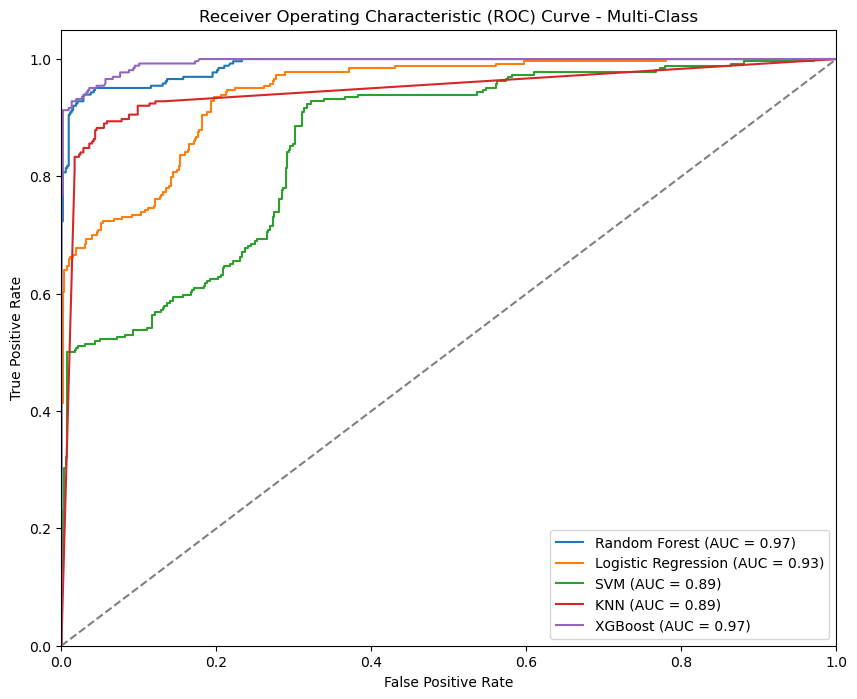

In [ ]:
#ROC AUC Evaluation
y_train_bin = label_binarize(y_train_resampled, classes=[0, 1, 2])
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

plt.figure(figsize=(10, 8))

for model_name, model in models.items():
    model.fit(X_train_scaled, y_train_resampled)

    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test_scaled)
    else:
        y_prob = model.decision_function(X_test_scaled)

    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_prob.ravel())
    auc_score = roc_auc_score(y_test_bin, y_prob, multi_class='ovr')

    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Multi-Class')
plt.legend(loc='lower right')
plt.show()

In [ ]:
#Pencarian Param
dfDPM = df.drop(columns=['nama_produk', 'desc', 'store', 'kategori', 'sub_kategori', 'harga_kategori', 'restock', 'popularitas'], errors='ignore')
X = dfDPM[['harga_per_rating', 'rasio_penjualan_stok', 'avg_rating']]
#X = dfDPM.drop(columns=['popularitas_encoding'])
y = dfDPM['popularitas_encoding']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampleds, y_train_resampleds = smote.fit_resample(X_train, y_train)

undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train_resampleds, y_train_resampleds)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

param_grids = {
    "RandomForest": {'n_estimators': [100, 200, 300], 'max_depth': [5, 7], 'min_samples_split': [2, 5], 'max_features': ['sqrt']},
    "LogisticRegression": {'C': [0.1, 1, 10], 'penalty': ['l2'], 'solver': ['lbfgs', 'liblinear'], 'max_iter': [100, 200]},
    "SVM": {'C': [0.1, 1], 'kernel': ['linear', 'rbf'], 'gamma': ['scale']},
    "KNN": {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance'], 'metric': ['minkowski'], 'p': [2]},
    "XGBoost": {'n_estimators': [100, 200], 'learning_rate': [0.1], 'max_depth': [3, 4], 'subsample': [0.8, 1.0]}
}

models = {
    "RandomForest": RandomForestClassifier(),
    "LogisticRegression": LogisticRegression(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier()
}

best_models = {model_name: GridSearchCV(model, param_grids[model_name], cv=5, n_jobs=-1).fit(X_train_scaled, y_train_resampled).best_estimator_ for model_name, model in models.items()}

for model_name, best_model in best_models.items():
    y_pred = best_model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Best Params: {best_model.get_params()}")
    print(f"Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

RandomForest Best Params: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 7, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Accuracy: 0.9470
              precision    recall  f1-score   support

           0       0.70      0.78      0.74         9
           1       0.31      0.83      0.45         6
           2       1.00      0.96      0.98       249

    accuracy                           0.95       264
   macro avg       0.67      0.86      0.72       264
weighted avg       0.97      0.95      0.96       264

[[  7   2   0]
 [  1   5   0]
 [  2   9 238]]
LogisticRegression Best Params: {'C': 10, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scal

In [ ]:
#Feature and Corellation Check

Rekomendasi Fitur Berdasarkan Pentingnya:
                    Feature  Importance
9          skor_popularitas    0.447569
1                   terjual    0.204315
2              total_rating    0.125786
7          harga_per_rating    0.070535
11       stok_terjual_ratio    0.033388
13     rasio_penjualan_stok    0.029788
8             harga_terjual    0.016211
0                     harga    0.015924
12               stok_ideal    0.013444
3                avg_rating    0.012385
6     sub_kategori_encoding    0.012245
4                     stock    0.006758
15         restock_encoding    0.004937
10   avg_harga_per_kategori    0.003065
14  harga_kategori_encoding    0.002635
5         kategori_encoding    0.001015


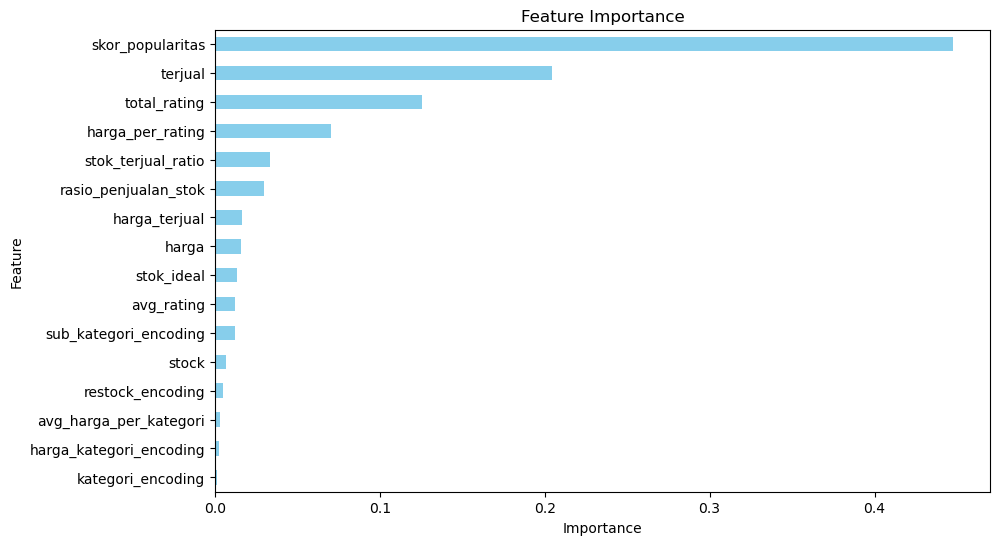

In [ ]:
X = dfDPM.drop(columns=['popularitas_encoding'])
y = dfDPM['popularitas_encoding']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

feature_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Rekomendasi Fitur Berdasarkan Pentingnya:")
print(feature_df)

feature_df.plot.barh(x='Feature', y='Importance', color='skyblue', figsize=(10, 6), legend=False)
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
correlation_matrix = dfDPM.corr()

print(correlation_matrix['popularitas_encoding'].sort_values(ascending=False))

popularitas_encoding       1.000000
restock_encoding           0.334069
total_rating               0.172224
skor_popularitas           0.160989
terjual                    0.141456
kategori_encoding          0.124854
rasio_penjualan_stok       0.077264
harga_terjual              0.055581
stock                      0.053922
sub_kategori_encoding     -0.066250
stok_ideal                -0.114895
avg_harga_per_kategori    -0.139008
avg_rating                -0.144800
harga                     -0.152826
harga_kategori_encoding   -0.170760
stok_terjual_ratio        -0.253762
harga_per_rating          -0.527401
Name: popularitas_encoding, dtype: float64


In [ ]:
#Model digunakan dipilih
xgb_modelPrice #Menentukan harga dinamis
xgb_modelStock #Menentukan stock ideal
xgb_modelPopu #Menentukan popularitas produk

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)